In [84]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from bioinfokit.analys import get_data
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

In [85]:
sns.set(style='white', rc={'figure.figsize':(100,30)})

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 30}
plt.rc('font', **font)

sns.set(font_scale=1)

In [86]:
# Import Data
control = pd.read_csv(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220701_MSC_irrad\control.csv")
irrad = pd.read_csv(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220701_MSC_irrad\irrad.csv")

control.head()
irrad.head()

,Culture,SABG,CD44
0,Irrad,22.155,21.292
1,Irrad,23.037,24.136
2,Irrad,24.898,28.648
3,Irrad,22.078,28.781
4,Irrad,22.755,22.009


In [87]:
# Concatenate Data
culture_data = pd.concat([control, irrad], ignore_index=True)
culture_data.head()

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(data)

,Culture,SABG,CD44
0,Control,17.384,23.094
1,Control,17.275,20.020
2,Control,17.125,20.708
3,Control,17.245,19.139
4,Control,17.079,18.580


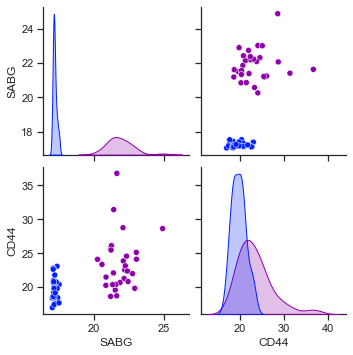

In [88]:
palette = {"Control":"#0020ff", 
           "Irrad":"#8F00AA"}

sns.set_style("white")
sns.set_style("ticks")

g = sns.pairplot(culture_data, hue='Culture', palette=palette)

g._legend.remove()

In [89]:
import umap

In [90]:
reducer = umap.UMAP()

In [91]:
marker_data = culture_data[["SABG", "CD44"]].values
embedding = reducer.fit_transform(marker_data)
embedding.shape

(60, 2)

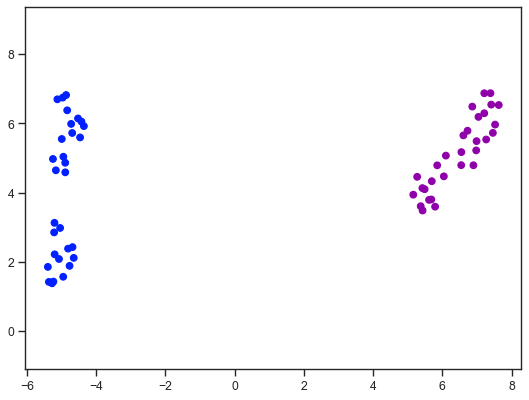

In [92]:
figure(figsize=(8, 6), dpi=80)

plt.scatter(embedding[:, 0], embedding[:, 1], c=[palette[x] for x in culture_data.Culture])
                  
# plt.xlabel("UMAP 1")
# plt.ylabel("UMAP 2")
plt.gca().set_aspect('equal', 'datalim')

plt.savefig(fname="MSC_irrad_UMAP")

In [93]:
marker_LDA = LDA(n_components=1).fit_transform(marker_data,culture_data.Culture)

In [94]:
plt.scatter(marker_LDA[:,0], marker_LDA[:, 1], c=[palette[x] for x in culture_data.Culture])

plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
plt.gca().set_aspect('equal', 'datalim')

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
marker_PCA = PCA().fit(marker_data)

In [ ]:
target = culture_data.Culture.to_numpy()

loadings = marker_PCA.components_
marker_PCA.explained_variance_

pca_scores = PCA().fit_transform(marker_data)

cluster.biplot(cscore=pca_scores, loadings=loadings, labels=culture_data.Culture, var1=round(marker_PCA.explained_variance_ratio_[0]*100, 2), var2=round(marker_PCA.explained_variance_ratio_[1]*100, 2))